In [106]:
## Dependencies
import pandas as pd
import seaborn
import tensorflow as tf 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [107]:
# Imports our combined data
song_df = pd.read_csv("Resources/combined_songs.csv")
song_df

,Unnamed: 0.1,Unnamed: 0,song_id,song_name,album,artist,duration(ms),release_date,acousticness,danceability,...,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,0,0,3k79jB4aGmMDUQzEwa46Rz,vampire,vampire,Olivia Rodrigo,219724,2023-06-30,0.1690,0.511,...,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,1,1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,231750,2023-08-04,0.2690,0.868,...,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,2,2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,227195,2023-08-25,0.5540,0.429,...,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,3,3,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Gettin' Old,Luke Combs,265493,2023-03-24,0.1860,0.712,...,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,4,4,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,178426,2019-08-23,0.1170,0.552,...,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,95,3ieLey98V9mIIh3W9gBlPF,Barcelona,Wanted on Voyage (Expanded Edition),George Ezra,188960,2014-06-30,0.3200,0.629,...,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
1995,1995,96,023OVLNzXhX0j7CxswUt6D,Cheerleader - Felix Jaehn Remix Radio Edit,Me 4 U,OMI,180560,2015-10-16,0.1410,0.780,...,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
1996,1996,97,0hNduWmlWmEmuwEFcYvRu1,Sunset Lover,Sunset Lover,Petit Biscuit,237792,2015,0.7290,0.783,...,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
1997,1997,98,1BZG99C7Co1r6QUC3zaS59,Same Old Love,Revival (Deluxe),Selena Gomez,229080,2015-10-09,0.0223,0.672,...,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [108]:
# Allows us to change the binary popularity score for testing
binary_popularity = []

song_df = song_df.drop(columns="binary_popularity")

for x in song_df["popularity"]:
    if x >= 70:
        binary_popularity.append("1")
    else:
        binary_popularity.append("0")

song_df["binary_popularity"] = binary_popularity
song_df

,Unnamed: 0.1,Unnamed: 0,song_id,song_name,album,artist,duration(ms),release_date,acousticness,danceability,...,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,0,0,3k79jB4aGmMDUQzEwa46Rz,vampire,vampire,Olivia Rodrigo,219724,2023-06-30,0.1690,0.511,...,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,1,1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,231750,2023-08-04,0.2690,0.868,...,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,2,2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,227195,2023-08-25,0.5540,0.429,...,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,3,3,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Gettin' Old,Luke Combs,265493,2023-03-24,0.1860,0.712,...,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,4,4,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,178426,2019-08-23,0.1170,0.552,...,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1994,95,3ieLey98V9mIIh3W9gBlPF,Barcelona,Wanted on Voyage (Expanded Edition),George Ezra,188960,2014-06-30,0.3200,0.629,...,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
1995,1995,96,023OVLNzXhX0j7CxswUt6D,Cheerleader - Felix Jaehn Remix Radio Edit,Me 4 U,OMI,180560,2015-10-16,0.1410,0.780,...,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
1996,1996,97,0hNduWmlWmEmuwEFcYvRu1,Sunset Lover,Sunset Lover,Petit Biscuit,237792,2015,0.7290,0.783,...,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
1997,1997,98,1BZG99C7Co1r6QUC3zaS59,Same Old Love,Revival (Deluxe),Selena Gomez,229080,2015-10-09,0.0223,0.672,...,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [109]:
# Shows us the correlation between each feature in the dataset, showing us what to features to keep and get rid of when fitting the model
copy_song_df = song_df.drop(columns=song_df.columns[:5])
copy_df_cor = copy_song_df.corr()
copy_df_cor

C:\Users\Jesse\AppData\Local\Temp\ipykernel_8916\3732938154.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df_cor = copy_song_df.corr()


,duration(ms),acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity
duration(ms),1.000000,0.102588,-0.217351,-0.088343,0.158785,-0.011823,0.027890,-0.157398,-0.017903,-0.053629,-0.010998,-0.035757,-0.115361,-0.180829
acousticness,0.102588,1.000000,-0.386173,-0.752695,0.472695,-0.029684,-0.092062,-0.662176,0.064976,-0.177492,-0.143839,-0.221302,-0.288249,-0.189254
danceability,-0.217351,-0.386173,1.000000,0.285868,-0.359673,0.053289,-0.048114,0.392944,-0.095326,0.278729,-0.079603,0.193932,0.451830,0.247654
energy,-0.088343,-0.752695,0.285868,1.000000,-0.424753,0.037179,0.176125,0.789988,-0.061828,0.153399,0.153044,0.225294,0.425092,0.118836
insturmentalness,0.158785,0.472695,-0.359673,-0.424753,1.000000,-0.016152,-0.093966,-0.588076,0.013169,-0.155160,-0.139056,-0.190200,-0.247841,-0.270880
key,-0.011823,-0.029684,0.053289,0.037179,-0.016152,1.000000,-0.004156,0.018009,-0.151390,0.077030,-0.024222,0.032698,0.062764,0.017131
liveness,0.027890,-0.092062,-0.048114,0.176125,-0.093966,-0.004156,1.000000,0.117125,-0.016334,0.069873,0.005437,0.011412,0.074761,-0.041358
loudness,-0.157398,-0.662176,0.392944,0.789988,-0.588076,0.018009,0.117125,1.000000,-0.032740,0.136553,0.129865,0.250874,0.339894,0.259689
mode,-0.017903,0.064976,-0.095326,-0.061828,0.013169,-0.151390,-0.016334,-0.032740,1.000000,-0.141405,0.022353,-0.016750,-0.015321,-0.033682
spechiness,-0.053629,-0.177492,0.278729,0.153399,-0.155160,0.077030,0.069873,0.136553,-0.141405,1.000000,0.059462,0.052655,0.144202,0.092897


<Axes: >

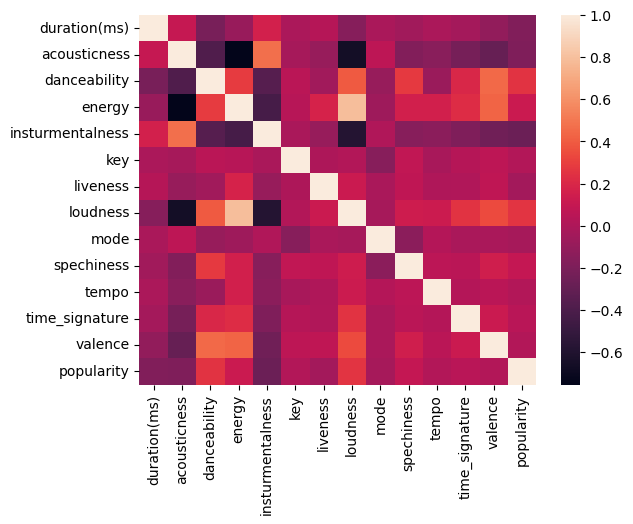

In [110]:
# Creates a heatmap for easier visualization
seaborn.heatmap(copy_df_cor)

In [111]:
# Creates our X feature for the model with our chosen features
X = copy_song_df.copy()
X.drop(["popularity", "binary_popularity", "release_date", "time_signature", "artist"], axis=1, inplace=True)
X.head()

,duration(ms),acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,valence
0,219724,0.169,0.511,0.532,0.000000,5,0.3110,-5.745,1,0.0560,137.827,0.322
1,231750,0.269,0.868,0.538,0.000003,5,0.0901,-8.603,1,0.1740,99.968,0.732
2,227195,0.554,0.429,0.453,0.000002,0,0.1020,-7.746,1,0.0459,77.639,0.155
3,265493,0.186,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,0.670
4,178426,0.117,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,0.564


<Axes: >

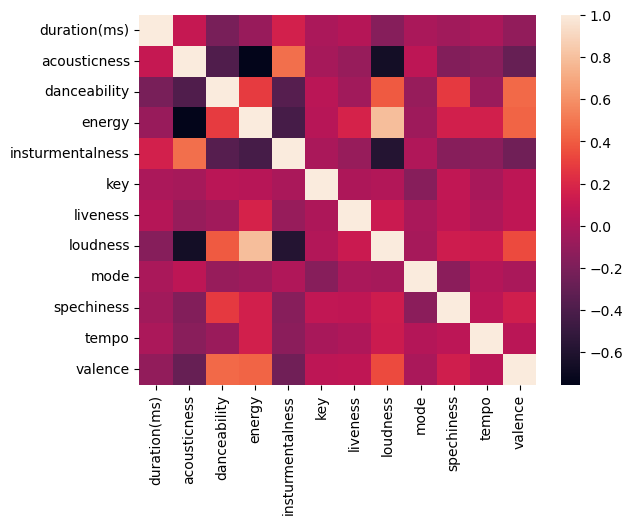

In [112]:
# Shows a correlation heatmap for our chosen features
seaborn.heatmap(X.corr())

In [113]:
# Creates the y array for our model
y = copy_song_df["binary_popularity"].ravel()
y[:100]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [114]:
# Splits the X and y data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [115]:
# Scales our data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [116]:
# Oversamples our data to mimic under-represented data points
# oversampler = RandomOverSampler(sampling_strategy="minority")

# X_oversample_train, y_oversample_train = oversampler.fit_resample(X_train_scaled, y_train)

In [117]:
# Creates our Random Forest Model
rf_model = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=3, min_samples_leaf=10)

rf_model = rf_model.fit(X_train, y_train)

In [118]:
# Shows us the most important features in our dataset
feature_imp = rf_model.feature_importances_
#feature_imp.__index__
print(feature_imp)
print(X.columns)


[0.10101179 0.11060855 0.07104946 0.09981881 0.23400324 0.00166388
 0.00825408 0.27048543 0.00041343 0.07717698 0.0085983  0.01691605]
Index(['duration(ms)', 'acousticness', 'danceability', 'energy',
       'insturmentalness', 'key', 'liveness', 'loudness', 'mode', 'spechiness',
       'tempo', 'valence'],
      dtype='object')


In [119]:
# A way to show us the best params for our Random Forest Model
# rf_model = RandomForestClassifier(random_state=0)

# param_grid = {
#     #"n_estimators":[100, 500, 1000],
#     "max_depth":[3,5,7,10],
#     "min_samples_leaf":[2, 3, 5, 10],
#     #"max_features":["sqrt", "auto", "log2"]
# }

# rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid)

# rf_model = rf_grid_search.fit(X_train, y_train)

In [120]:
# Creates the predictions for the RM model
predictions = rf_model.predict(X_test)

In [121]:
# Creates our testing data confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [122]:
print("--------Confusion Matrix---------")
display(cm_df)
print(f'Accuracy Score {round(acc_score, 2)}')
print("---------------------------------")
print("Classfication Report")
print(classification_report(y_test, predictions))

--------Confusion Matrix---------


,Predicted 0,Predicted 1
Actual 0,133,109
Actual 1,35,223


Accuracy Score 0.71
---------------------------------
Classfication Report
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       242
           1       0.67      0.86      0.76       258

    accuracy                           0.71       500
   macro avg       0.73      0.71      0.70       500
weighted avg       0.73      0.71      0.70       500



In [123]:
# Predicts our training data
x_predictions = rf_model.predict(X_train)

In [124]:
# Generates the confusion matrix for our training data
train_cm_df = confusion_matrix(y_train, x_predictions)

train_cm_df = pd.DataFrame(
    train_cm_df, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_train, x_predictions)

In [125]:
print("--------Confusion Matrix---------")
display(train_cm_df)
print(f'Accuracy Score {round(acc_score, 2)}')
print("---------------------------------")
print("Classfication Report")
print(classification_report(y_train, x_predictions))

--------Confusion Matrix---------


,Predicted 0,Predicted 1
Actual 0,380,345
Actual 1,90,684


Accuracy Score 0.71
---------------------------------
Classfication Report
              precision    recall  f1-score   support

           0       0.81      0.52      0.64       725
           1       0.66      0.88      0.76       774

    accuracy                           0.71      1499
   macro avg       0.74      0.70      0.70      1499
weighted avg       0.73      0.71      0.70      1499

